In [58]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [59]:
# Number of pairs feature/label.
M = 10000

In [60]:
# Input values (features)
x = 10.0*np.random.rand(M, 1)

# Output values (targets).
y = 2.0*x + 10.0*np.random.randn(M, 1)

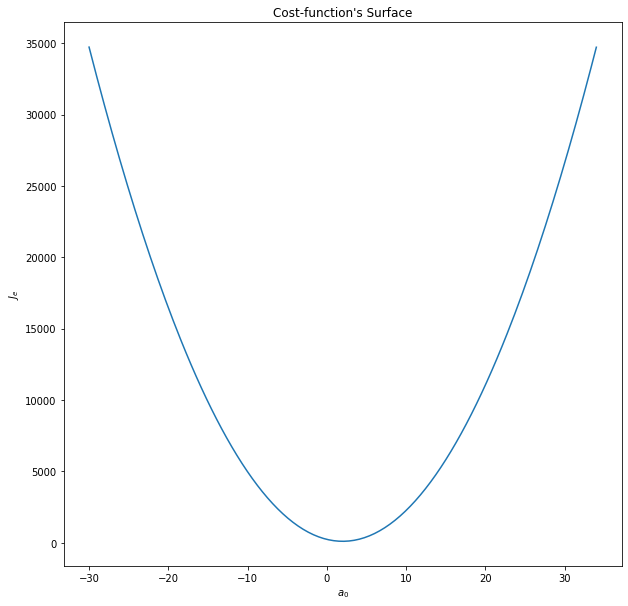

In [61]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-30.0, 34.0, N)

# Generate points for plotting the cost-function surface.
J = np.zeros((N))
for iter1 in range(0, N):
    yhat = a1[iter1]*x
    J[iter1] = (1/M)*np.sum( np.square(y - yhat)  );

# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
plt.plot(a1, J)
plt.xlabel('$a_0$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

In [62]:
# Closed-form solution.
X = x

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = a_opt[0]*x

Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [66]:
# Gradient-descent solution.
maxNumIter = 10000

alpha = 0.01

# Create empty structures.
a = np.zeros((maxNumIter))
Jgd = np.zeros(maxNumIter)

a[0] = -30;

yhat = a[0]*x

Jgd[0] = (1/M)*np.sum(np.power(y - yhat, 2))

error = 1;
iter = 0;
while(error > 0.001 and iter < maxNumIter-1):
    
    h = a[iter]*x;
    
    update = -(2./M)*np.transpose( (y - h) ).dot(X)
    
    a_aux = a[iter] - alpha*np.transpose(update)
    
    a[iter+1] = a_aux[0]
    
    yhat = a[iter+1]*x

    Jgd[iter+1] = (1/M)*sum(np.power(y - yhat, 2))
    
    error = np.abs(Jgd[iter]-Jgd[iter+1])
    
    iter = iter + 1

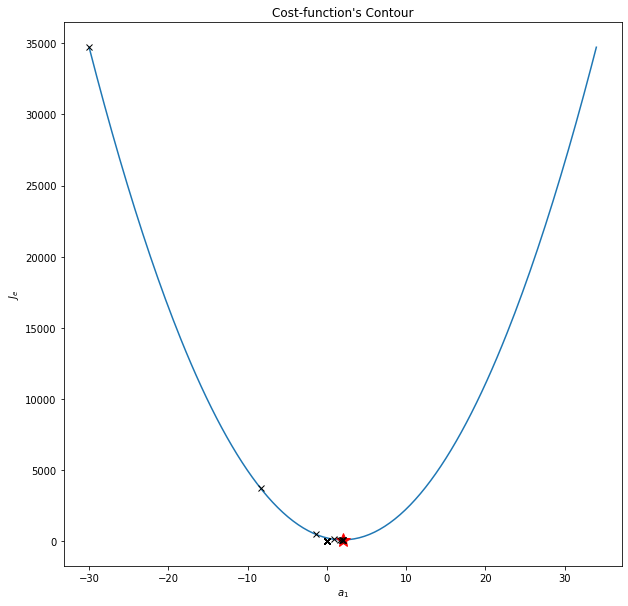

In [67]:
fig = plt.figure(figsize=(10,10))
plt.plot(a1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], Joptimum, c='r', marker='*', markersize=14)
plt.plot(a[:], Jgd, 'kx')
plt.show()

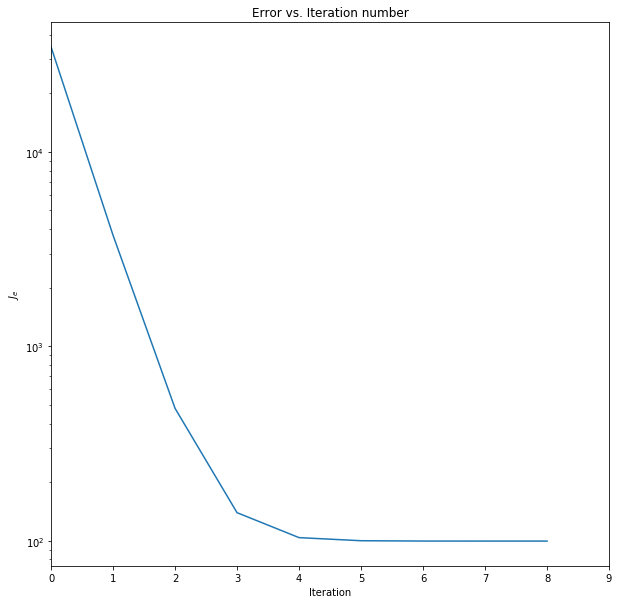

In [68]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, iter), Jgd[0:iter])
plt.xlim((0, iter))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

In [69]:
print('a_opt: ' + str(a_opt[0][0]))
print('a_gd: ' + str(a[iter]))

a_opt: 2.0019337131361263
a_gd: 2.000686362293463
